# Amazon Customer Sentiment Analysis

In [1]:
import pandas as pd

### df1 has  Customer and Product details

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv("/content/drive/MyDrive/amazon reviews/20191226-items.csv")

### df2 has Review and Ratings

In [4]:
df2=pd.read_csv("/content/drive/MyDrive/amazon reviews/20191226-reviews.csv")

In [5]:
df1

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.00
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.00
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.00
...,...,...,...,...,...,...,...,...,...,...
715,B07ZPKZSSC,Apple,"Apple iPhone 11 Pro, 64GB, Fully Unlocked - Sp...",https://www.amazon.com/Apple-iPhone-64GB-Fully...,https://m.media-amazon.com/images/I/41wDuEW9iZ...,1.0,https://www.amazon.com/product-reviews/B07ZPKZSSC,1,949.00,0.00
716,B07ZQSGP53,Xiaomi,"Xiaomi Redmi Note 8, 32GB/3GB RAM 6.3"" FHD+ Di...",https://www.amazon.com/Xiaomi-Display-Snapdrag...,https://m.media-amazon.com/images/I/41foh4FKHE...,4.6,https://www.amazon.com/product-reviews/B07ZQSGP53,3,150.96,0.00
717,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
718,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


In [ ]:
df2

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


### Merging product and review dataset

In [6]:
df=pd.merge(df2, df1, on='asin')

In [7]:
df.rename(columns={'title_x':'review_title'}, inplace=True)
df.rename(columns={'title_y':'product'}, inplace=True)

In [8]:
df

,asin,name,rating_x,date,verified,review_title,body,helpfulVotes,brand,product,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


In [9]:
df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'review_title', 'body',
       'helpfulVotes', 'brand', 'product', 'url', 'image', 'rating_y',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### Data Cleaning

In [10]:
df.isnull().sum()

asin                 0
name                 2
rating_x             0
date                 0
verified             0
review_title        14
body                21
helpfulVotes     40771
brand              200
product              0
url                  0
image                0
rating_y             0
reviewUrl            0
totalReviews         0
price                0
originalPrice        0
dtype: int64

In [11]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Fill missing values in numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in non-numeric columns with mode
for col in non_numeric_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)


In [12]:
df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'review_title', 'body',
       'helpfulVotes', 'brand', 'product', 'url', 'image', 'rating_y',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [13]:
columns=['asin', 'name', 'rating_x', 'date', 'verified', 'product', 'body',
       'helpfulVotes', 'brand', 'review_title', 'url', 'image', 'rating_y',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice']
for column in columns:
  nunique_columns = df[column].nunique()
  print(f"No of unique values in {column}:{nunique_columns}")

No of unique values in asin:720
No of unique values in name:47323
No of unique values in rating_x:5
No of unique values in date:2983
No of unique values in verified:2
No of unique values in product:718
No of unique values in body:59811
No of unique values in helpfulVotes:279
No of unique values in brand:10
No of unique values in review_title:41489
No of unique values in url:720
No of unique values in image:679
No of unique values in rating_y:33
No of unique values in reviewUrl:720
No of unique values in totalReviews:247
No of unique values in price:453
No of unique values in originalPrice:90


In [ ]:
columns=['asin', 'name', 'rating_x', 'date', 'verified', 'product', 'body',
       'helpfulVotes', 'brand', 'review_title', 'url', 'image', 'rating_y',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice']
for column in columns:
  nunique_columns = df[column].nunique()
  length= len(df)
  percentage = (nunique_columns/length)*100
  print(f"Percentage of unique values in {column}:{percentage}")

Percentage of unique values in asin:1.0590415673815197
Percentage of unique values in name:69.60697790721619
Percentage of unique values in rating_x:0.0073544553290383315
Percentage of unique values in date:4.387668049304269
Percentage of unique values in verified:0.0029417821316153323
Percentage of unique values in product:1.0560997852499043
Percentage of unique values in body:87.97546553702233
Percentage of unique values in helpfulVotes:0.4103786073603389
Percentage of unique values in brand:0.014708910658076663
Percentage of unique values in review_title:61.02579942929427
Percentage of unique values in url:1.0590415673815197
Percentage of unique values in image:0.9987350336834054
Percentage of unique values in rating_y:0.048539405171652984
Percentage of unique values in reviewUrl:1.0590415673815197
Percentage of unique values in totalReviews:0.36331009325449354
Percentage of unique values in price:0.6663136528108728
Percentage of unique values in originalPrice:0.13238019592268996


In [ ]:
len(df)

67986

In [ ]:
df['asin'].value_counts()

B00F2SKPIM    981
B00836Y6B2    925
B07FZH9BGV    791
B01D1J9BGU    775
B018OMP8ES    773
             ... 
B07T9G946J      1
B07TD6F34D      1
B0096DERAG      1
B07YBHNTSK      1
B07TKQ8QYW      1
Name: asin, Length: 720, dtype: int64

In [ ]:
df['name'].value_counts()

Amazon Customer        6509
Kindle Customer         360
Chris                    89
John                     87
Michael                  77
                       ... 
David L.G. Crawford       1
Paul Ramone               1
Anya Rochester            1
Glenda S.                 1
Owen Gonzalez             1
Name: name, Length: 47323, dtype: int64

In [ ]:
df['date']

0          October 11, 2005
1           January 7, 2004
2         December 30, 2003
3            March 18, 2004
4           August 28, 2005
                ...        
67981       August 16, 2019
67982    September 14, 2019
67983         July 14, 2019
67984     December 24, 2019
67985     December 11, 2019
Name: date, Length: 67986, dtype: object

In [14]:
df['date']=pd.to_datetime(df['date'], format= '%B %d, %Y')

In [15]:
df['date']

0       2005-10-11
1       2004-01-07
2       2003-12-30
3       2004-03-18
4       2005-08-28
           ...    
67981   2019-08-16
67982   2019-09-14
67983   2019-07-14
67984   2019-12-24
67985   2019-12-11
Name: date, Length: 67986, dtype: datetime64[ns]

In [ ]:
df['date'].dt.year.nunique()

17

In [ ]:
df['date'].dt.year.unique()

array([2005, 2004, 2003, 2016, 2006, 2009, 2010, 2017, 2019, 2011, 2013,
       2014, 2008, 2012, 2007, 2015, 2018])

In [16]:
df.isnull().sum()

asin             0
name             0
rating_x         0
date             0
verified         0
review_title     0
body             0
helpfulVotes     0
brand            0
product          0
url              0
image            0
rating_y         0
reviewUrl        0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [17]:
df['brand'].value_counts()

Samsung     33829
Motorola     8880
Nokia        5915
Apple        5145
Xiaomi       4411
Google       3787
Sony         3196
HUAWEI       2225
OnePlus       347
ASUS          251
Name: brand, dtype: int64

### Data Visualization

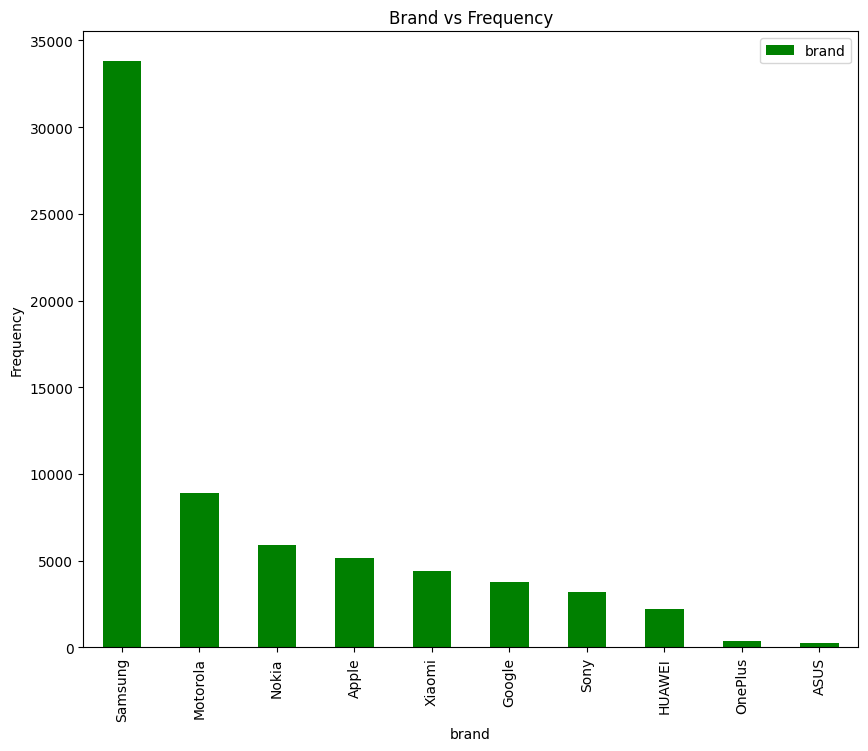

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
df['brand'].value_counts().plot(kind='bar',color='Green',legend=True)
plt.xlabel('brand')
plt.ylabel('Frequency')
plt.title('Brand vs Frequency')
plt.show()

In [ ]:
df['product'].value_counts().head(10)

Samsung Galaxy Note 3, Black 32GB (Verizon Wireless)                                                                              981
Nokia Lumia 900 Black Factory Unlocked                                                                                            925
Samsung Galaxy Note 9 Factory Unlocked Phone with 6.4" Screen and 128GB (U.S. Warranty), Ocean Blue                               791
Samsung Galaxy S7 Edge G935FD 32GB Unlocked GSM 4G LTE                                                                            775
Samsung Galaxy Note 5 SM-N920V Gold 32GB (Verizon Wireless)                                                                       773
Samsung Galaxy Note 5, Black  64GB (Verizon Wireless)                                                                             773
Motorola G6 – 32 GB – Unlocked (AT&T/Sprint/T-Mobile/Verizon) – Deep Indigo - (U.S. Warranty) - PAAE0011US                        773
Moto G - Verizon Prepaid Phone (Verizon Prepaid Only)         

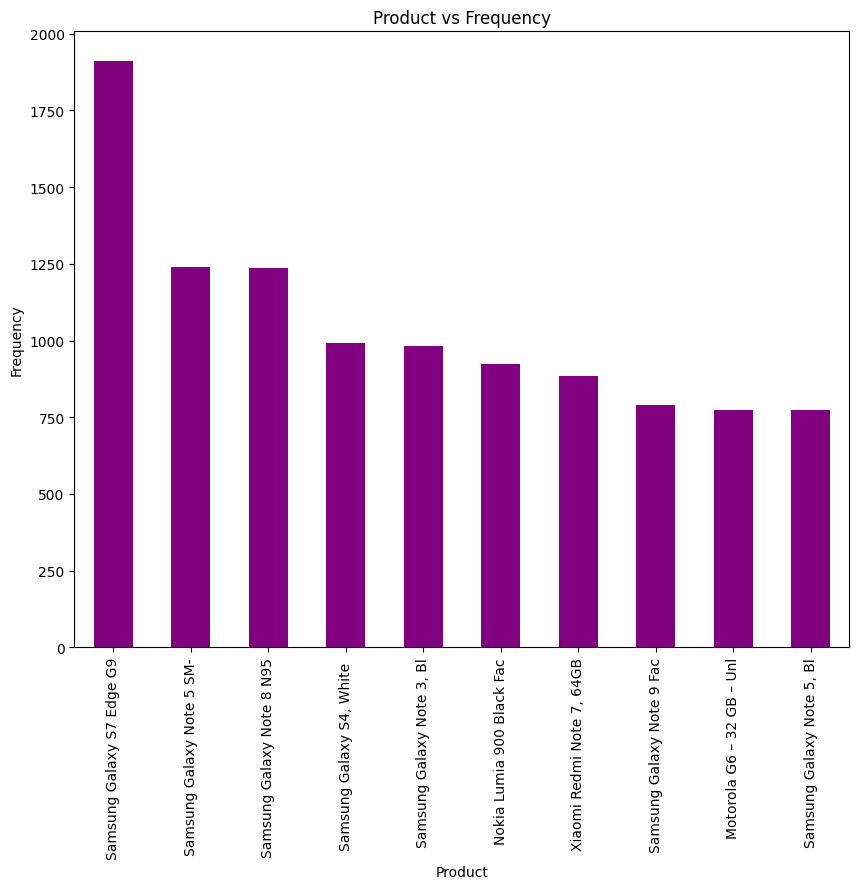

In [ ]:
import matplotlib.pyplot as plt

# Extracting main product names and limiting text
df['main_product'] = df['product'].str[:25]  # Extract first part and limit to 20 characters

plt.figure(figsize=[10,8])
df['main_product'].value_counts().head(10).plot(kind='bar', color='purple')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Product vs Frequency')
plt.show()


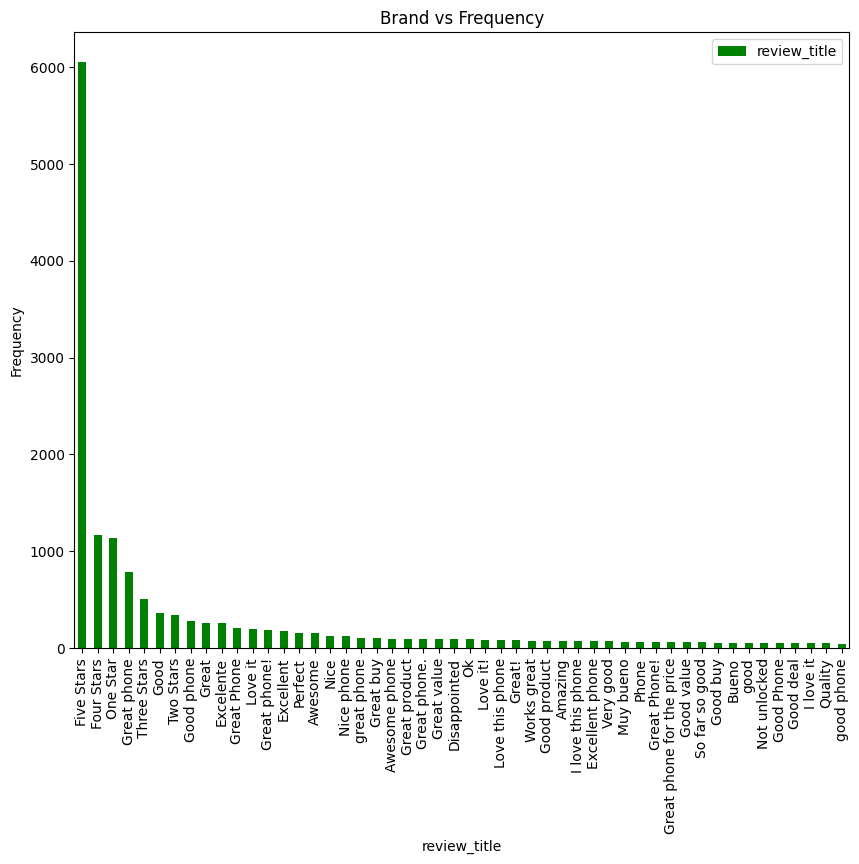

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
df['review_title'].value_counts().head(50).plot(kind='bar',color='Green',legend=True)
plt.xlabel('review_title')
plt.ylabel('Frequency')
plt.title('Brand vs Frequency')
plt.show()

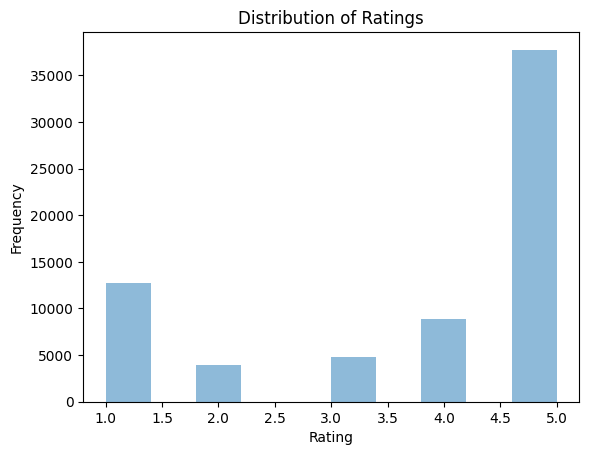

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['rating_x'], bins=10, alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

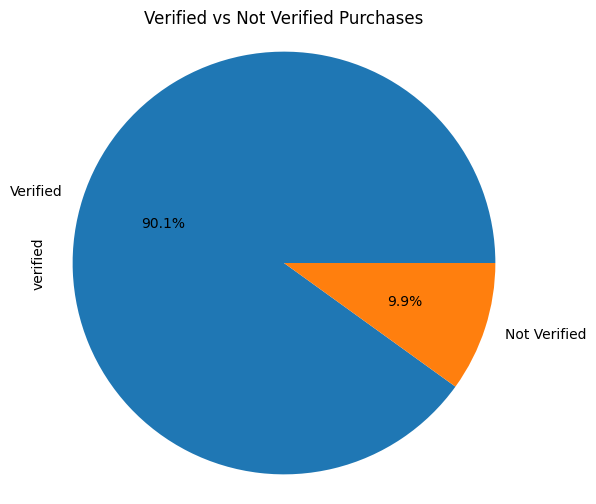

In [ ]:
plt.figure(figsize=(6, 6))
df['verified'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Verified', 'Not Verified'])
plt.title('Verified vs Not Verified Purchases')
plt.axis('equal')
plt.show()

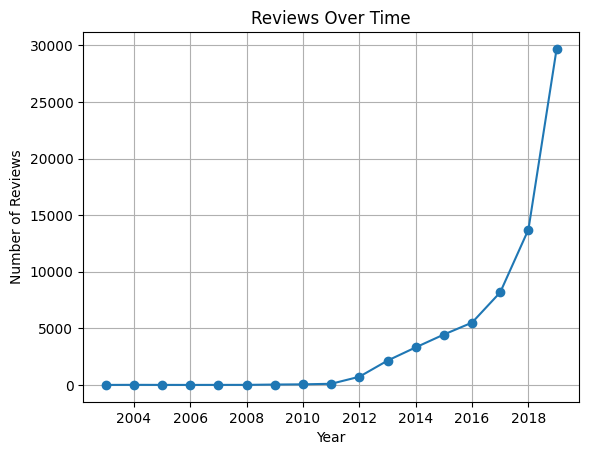

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

reviews_per_year = df['year'].value_counts().sort_index()

plt.plot(reviews_per_year.index, reviews_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Reviews Over Time')
plt.grid(True)
plt.show()

## Training the review and rating with Tokenizer and LSTM

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handle missing values in 'body' column
df['body'].fillna('', inplace=True)

# Subtract 1 from 'rating_x' to start encoding from 0
df['encoded_label'] = df['rating_x'] - 1

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['body'])
sequences = tokenizer.texts_to_sequences(df['body'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    padded_sequences, df['encoded_label'], test_size=0.2, random_state=42
)

# Build the LSTM model
embedding_dim = 16
num_classes = 5  # Number of unique classes
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(num_classes, activation='softmax')  # Adjusted for the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

Epoch 1/5
1700/1700 [==============================] - 203s 117ms/step - loss: 0.9124 - accuracy: 0.6767 - val_loss: 0.8292 - val_accuracy: 0.7054
Epoch 2/5
1700/1700 [==============================] - 203s 119ms/step - loss: 0.7823 - accuracy: 0.7138 - val_loss: 0.7794 - val_accuracy: 0.7105
Epoch 3/5
1700/1700 [==============================] - 203s 119ms/step - loss: 0.7291 - accuracy: 0.7305 - val_loss: 0.7757 - val_accuracy: 0.7154
Epoch 4/5
1700/1700 [==============================] - 194s 114ms/step - loss: 0.6898 - accuracy: 0.7416 - val_loss: 0.7873 - val_accuracy: 0.7161
Epoch 5/5
1700/1700 [==============================] - 195s 115ms/step - loss: 0.6609 - accuracy: 0.7522 - val_loss: 0.7918 - val_accuracy: 0.7116


## Evaluating the performance of LSTM

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

# Assuming 'model' is your trained model and 'test_data', 'test_labels' are your test sets

# Predictions
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_labels = predictions.argmax(axis=1)

# Calculate MAE, MSE, Accuracy, and R2 Score
mae = mean_absolute_error(test_labels, predicted_labels)
mse = mean_squared_error(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)
r2 = r2_score(test_labels, predicted_labels)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'R2 Score: {r2}')

425/425 [==============================] - 17s 39ms/step
Mean Absolute Error (MAE): 0.4793351963524048
Mean Squared Error (MSE): 1.064568318870422
Accuracy: 70.96%
R2 Score: 0.5780747371682989


425/425 [==============================] - 18s 41ms/step


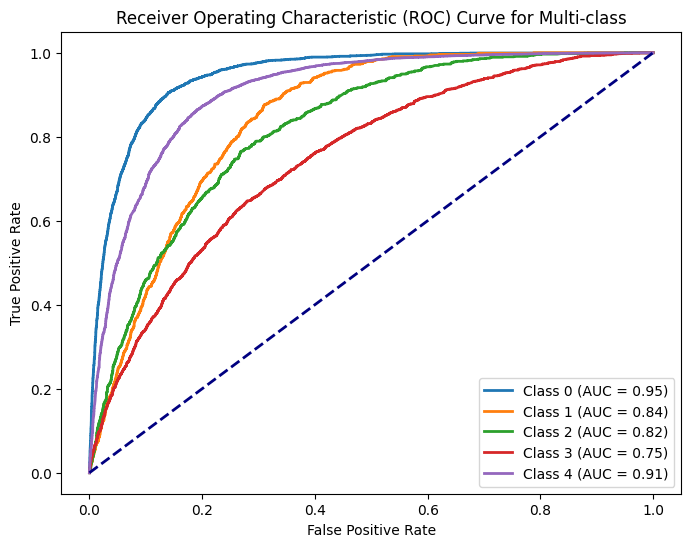

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'test_data', 'test_labels' are your test sets

# Predictions
predictions = model.predict(test_data)

# Convert labels to one-hot encoding
binarized_labels = label_binarize(test_labels, classes=[0, 1, 2, 3, 4])

# Number of classes
num_classes = binarized_labels.shape[1]

# Initialize dictionaries for fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate fpr, tpr, and roc_auc for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

Epoch 1/5
1700/1700 [==============================] - 230s 135ms/step - loss: 0.6256 - accuracy: 0.7693 - val_loss: 0.8133 - val_accuracy: 0.7165
Epoch 2/5
1700/1700 [==============================] - 227s 134ms/step - loss: 0.5961 - accuracy: 0.7811 - val_loss: 0.8275 - val_accuracy: 0.7144
Epoch 3/5
1700/1700 [==============================] - 227s 134ms/step - loss: 0.5667 - accuracy: 0.7927 - val_loss: 0.8428 - val_accuracy: 0.7107
Epoch 4/5
1700/1700 [==============================] - 226s 133ms/step - loss: 0.5370 - accuracy: 0.8064 - val_loss: 0.8926 - val_accuracy: 0.7084
Epoch 5/5
1700/1700 [==============================] - 224s 132ms/step - loss: 0.5081 - accuracy: 0.8172 - val_loss: 0.9415 - val_accuracy: 0.6974


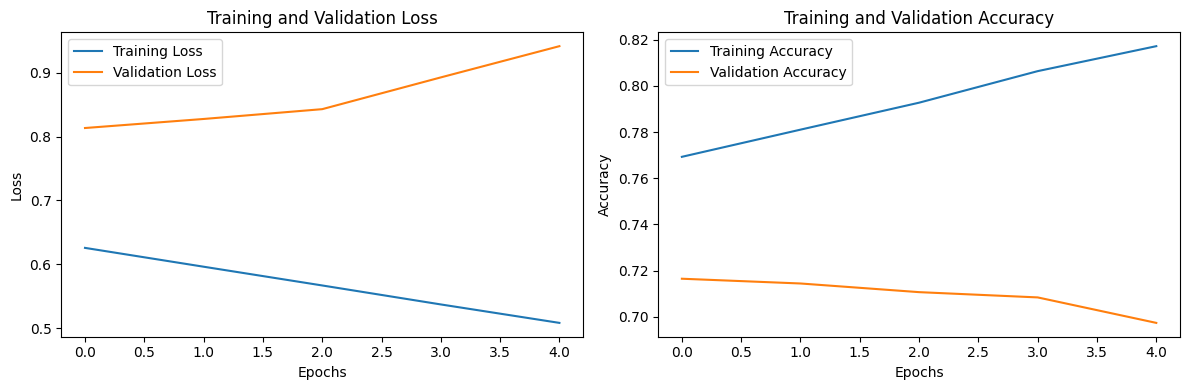

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history for plotting
history = model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Padded Sequences prediction from LSTM model and Sentimnent analysis of Predicted padded sequences 

In [19]:
# Predict sentiment scores for each review
sentiment_scores = model.predict(padded_sequences)

# Define a threshold for sentiment classification
threshold = 0.5  # You can adjust this threshold based on your preference

# Classify sentiments as positive or negative based on the threshold
sentiment_class = []
for scores in sentiment_scores:
    if any(score >= threshold for score in scores):
        sentiment_class.append('Positive')
    else:
        sentiment_class.append('Negative')

# Add sentiment scores and classification to the dataframe
for i in range(num_classes):
    df[f'sentiment_score_class_{i+1}'] = sentiment_scores[:, i]
df['sentiment_class'] = sentiment_class

# Display the dataframe with sentiment scores and classification
print(df[['body'] + [f'sentiment_score_class_{i+1}' for i in range(num_classes)] + ['sentiment_class']])


2125/2125 [==============================] - 65s 30ms/step
                                                    body  \
0      I had the Samsung A600 for awhile which is abs...   
1      Due to a software issue between Nokia and Spri...   
2      This is a great, reliable phone. I also purcha...   
3      I love the phone and all, because I really did...   
4      The phone has been great for every purpose it ...   
...                                                  ...   
67981  I love the camera on this phone. The screen is...   
67982  I've been an Xperia user for several years and...   
67983                         buy one more for my cousin   
67984  Product looks and works like new. Very much re...   
67985  I love the size and style of this phone. It is...   

       sentiment_score_class_1  sentiment_score_class_2  \
0                     0.263219                 0.335531   
1                     0.823194                 0.122211   
2                     0.013057             

In [ ]:
df.to_csv('/content/drive/MyDrive/amason_df')

In [ ]:
padded_sequences.shape

(67986, 100)

In [ ]:
df['body'].head(1)

0    I had the Samsung A600 for awhile which is abs...
Name: body, dtype: object

In [ ]:
df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'review_title', 'body',
       'helpfulVotes', 'brand', 'product', 'url', 'image', 'rating_y',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice', 'encoded_label',
       'sentiment_score_class_1', 'sentiment_score_class_2',
       'sentiment_score_class_3', 'sentiment_score_class_4',
       'sentiment_score_class_5', 'sentiment_class', 'sentiment_score'],
      dtype='object')

In [ ]:
df

,asin,name,rating_x,date,verified,review_title,body,helpfulVotes,brand,product,...,totalReviews,price,originalPrice,encoded_label,sentiment_score_class_1,sentiment_score_class_2,sentiment_score_class_3,sentiment_score_class_4,sentiment_score_class_5,sentiment_class
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,...,14,0.00,0.00,2,0.553630,0.274752,0.120701,0.027702,0.023216,Positive
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,...,14,0.00,0.00,0,0.841557,0.108550,0.028207,0.007025,0.014662,Positive
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,...,14,0.00,0.00,4,0.008910,0.013039,0.131265,0.495616,0.351171,Negative
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,...,14,0.00,0.00,2,0.082815,0.078754,0.167648,0.276132,0.394651,Negative
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,...,14,0.00,0.00,3,0.289581,0.379217,0.240379,0.059456,0.031367,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,2019-08-16,False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.00000,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,...,70,948.00,0.00,4,0.003093,0.002347,0.009695,0.097394,0.887470,Positive
67982,B081H6STQQ,2cool4u,5,2019-09-14,False,Simply Amazing!,I've been an Xperia user for several years and...,1.00000,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,...,70,948.00,0.00,4,0.001170,0.000715,0.003341,0.047506,0.947268,Positive
67983,B081H6STQQ,simon,5,2019-07-14,False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,8.22969,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,...,70,948.00,0.00,4,0.005470,0.001645,0.007752,0.057687,0.927446,Positive
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,2019-12-24,True,Phone is like new,Product looks and works like new. Very much re...,8.22969,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",...,1,478.97,0.00,4,0.000355,0.000143,0.001116,0.024027,0.974359,Positive


## Overall Sentiment  Score and Overall Sentiment Classification of each reviews

In [20]:
# Compute overall sentiment score from the class scores
df['overall_sentiment_score'] = sentiment_scores.max(axis=1)

# Classify overall sentiment as positive or negative based on the threshold
threshold = 0.5  # You can adjust this threshold based on your preference
df['overall_sentiment_class'] = ['Positive' if score >= threshold else 'Negative' for score in df['overall_sentiment_score']]

# Display the dataframe with overall sentiment scores and classification
df[['body', 'overall_sentiment_score', 'overall_sentiment_class']]

,body,overall_sentiment_score,overall_sentiment_class
0,I had the Samsung A600 for awhile which is abs...,0.335531,Negative
1,Due to a software issue between Nokia and Spri...,0.823194,Positive
2,"This is a great, reliable phone. I also purcha...",0.609434,Positive
3,"I love the phone and all, because I really did...",0.526446,Positive
4,The phone has been great for every purpose it ...,0.316439,Negative
...,...,...,...
67981,I love the camera on this phone. The screen is...,0.717034,Positive
67982,I've been an Xperia user for several years and...,0.909732,Positive
67983,buy one more for my cousin,0.849677,Positive
67984,Product looks and works like new. Very much re...,0.962587,Positive


## Average Overall Sentiment of Each brand 

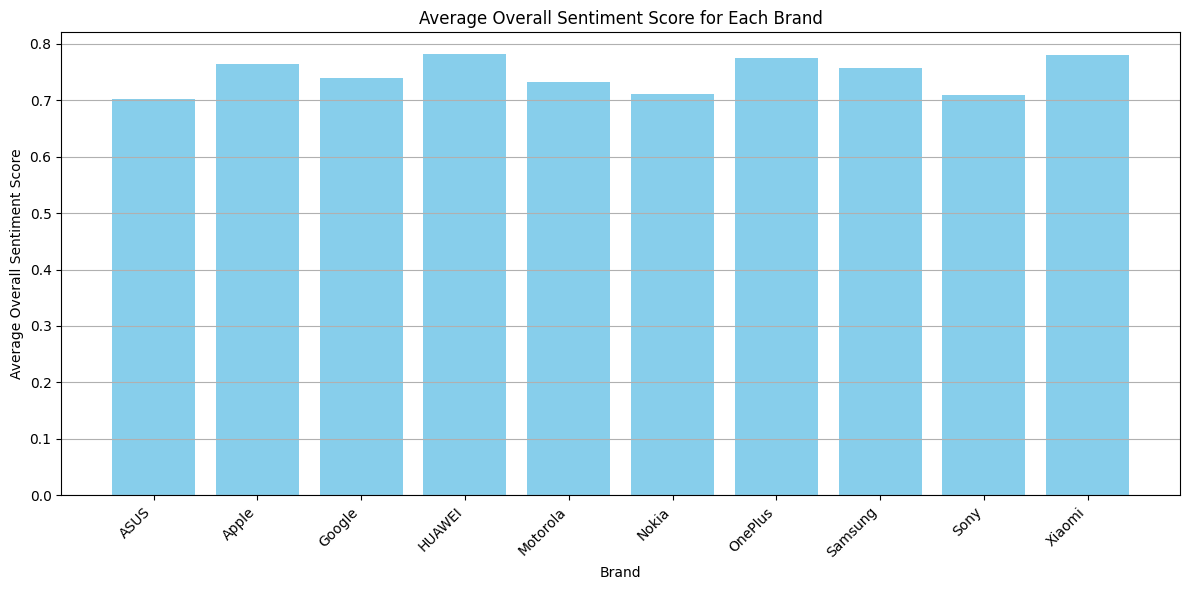

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Group the data by the brand and compute the average overall sentiment score for each brand
brand_sentiment = df.groupby('brand').agg({'overall_sentiment_score': 'mean'}).reset_index()

# 2. Plot the average sentiment scores for each brand
plt.figure(figsize=(12, 6))
plt.bar(brand_sentiment['brand'], brand_sentiment['overall_sentiment_score'], color='skyblue')
plt.title('Average Overall Sentiment Score for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Overall Sentiment Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Average Overall Sentiment of Each Product 

In [40]:
import pandas as pd
from tabulate import tabulate

# 1. Group the data by the product and compute the average overall sentiment score for each product
product_sentiment = df.groupby('product').agg({'overall_sentiment_score': 'mean'}).reset_index()

# 2. Truncate product names to a maximum length
max_product_length = 75 # Define the maximum length of the product name
product_sentiment['product_short'] = product_sentiment['product'].apply(lambda x: x[:max_product_length] + ('...' if len(x) > max_product_length else ''))

# 3. Prepare data for pretty table
table_data = product_sentiment[['product_short', 'overall_sentiment_score']].values.tolist()

# 4. Print the pretty table
print(tabulate(table_data, headers=['Product', 'Average Overall Sentiment Score'], tablefmt='pretty'))


+--------------------------------------------------------------------------------+---------------------------------+
|                                    Product                                     | Average Overall Sentiment Score |
+--------------------------------------------------------------------------------+---------------------------------+
| ASUS ROG Phone 2 (ZS660KL) Smartphone 128GB ROM 8GB RAM Snapdragon 855 Plus... |       0.6745197176933289        |
| ASUS ZenFone 5Z (ZS620KL-S845-6G64G) - 6.2” FHD+ 2160x1080 display - 6GB RA... |       0.7189245820045471        |
| ASUS ZenFone Max Plus ZB570TL-MT67-3G32G-BL - 5.7” 1920x1080-3GB RAM - 32GB... |       0.6949906349182129        |
| ASUS ZenFone V Smartphone - Verizon Exclusive Model - 32GB - Saphire Black ... |       0.6004371047019958        |
| AT&T Moto E5 Play with 16GB Memory Prepaid Cell Phone - Black - Carrier Loc... |       0.7189664840698242        |
| Apple MGLW2LL/A iPad Air 2 9.7-Inch Retina Display, 16GB, Wi-F

## Average Overall Sentiment of brand over the period of time 

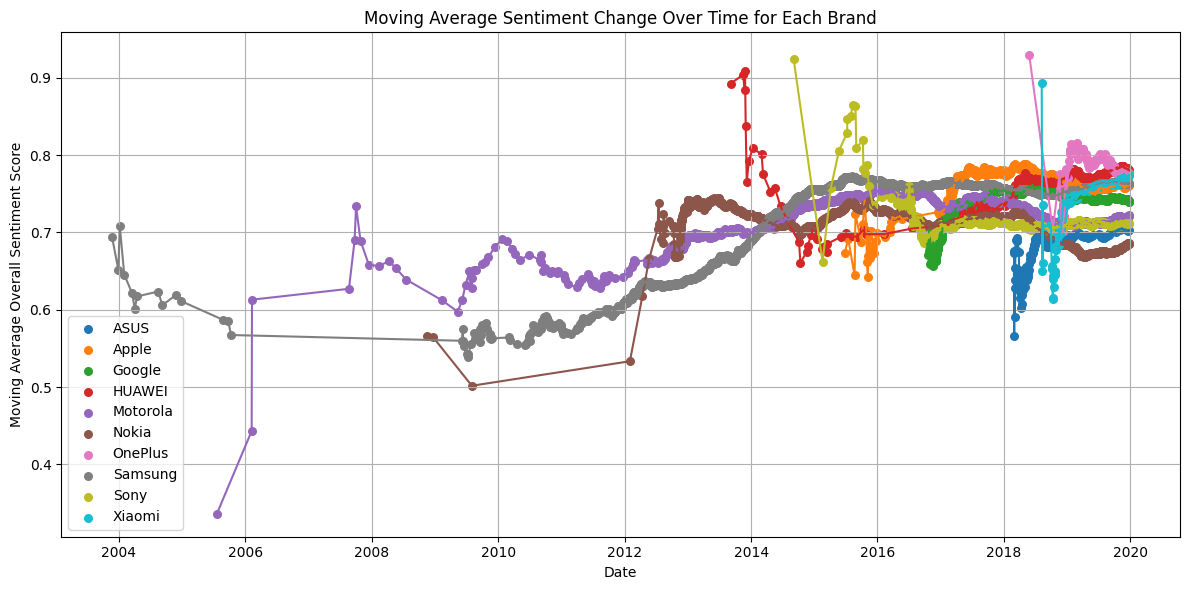

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Group the data by the brand and date, and compute the average overall sentiment score for each brand and date
brand_sentiment_over_time = df.groupby(['brand', pd.Grouper(key='date', freq='D')]).agg({'overall_sentiment_score': 'mean'}).reset_index()

# 2. Calculate the moving average for each brand
moving_avg_window = 365  # Increased window size
brand_sentiment_over_time['moving_average'] = brand_sentiment_over_time.groupby('brand')['overall_sentiment_score'].rolling(window=moving_avg_window, min_periods=1).mean().reset_index(drop=True)

# 3. Plot the moving average sentiment change over time for each brand using scatterplot with lines
plt.figure(figsize=(12, 6))
for brand in brand_sentiment_over_time['brand'].unique():
    brand_data = brand_sentiment_over_time[brand_sentiment_over_time['brand'] == brand]
    plt.scatter(brand_data['date'], brand_data['moving_average'], label=brand, marker='o', s=30)
    plt.plot(brand_data['date'], brand_data['moving_average'], linestyle='-')

plt.title('Moving Average Sentiment Change Over Time for Each Brand')
plt.xlabel('Date')
plt.ylabel('Moving Average Overall Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


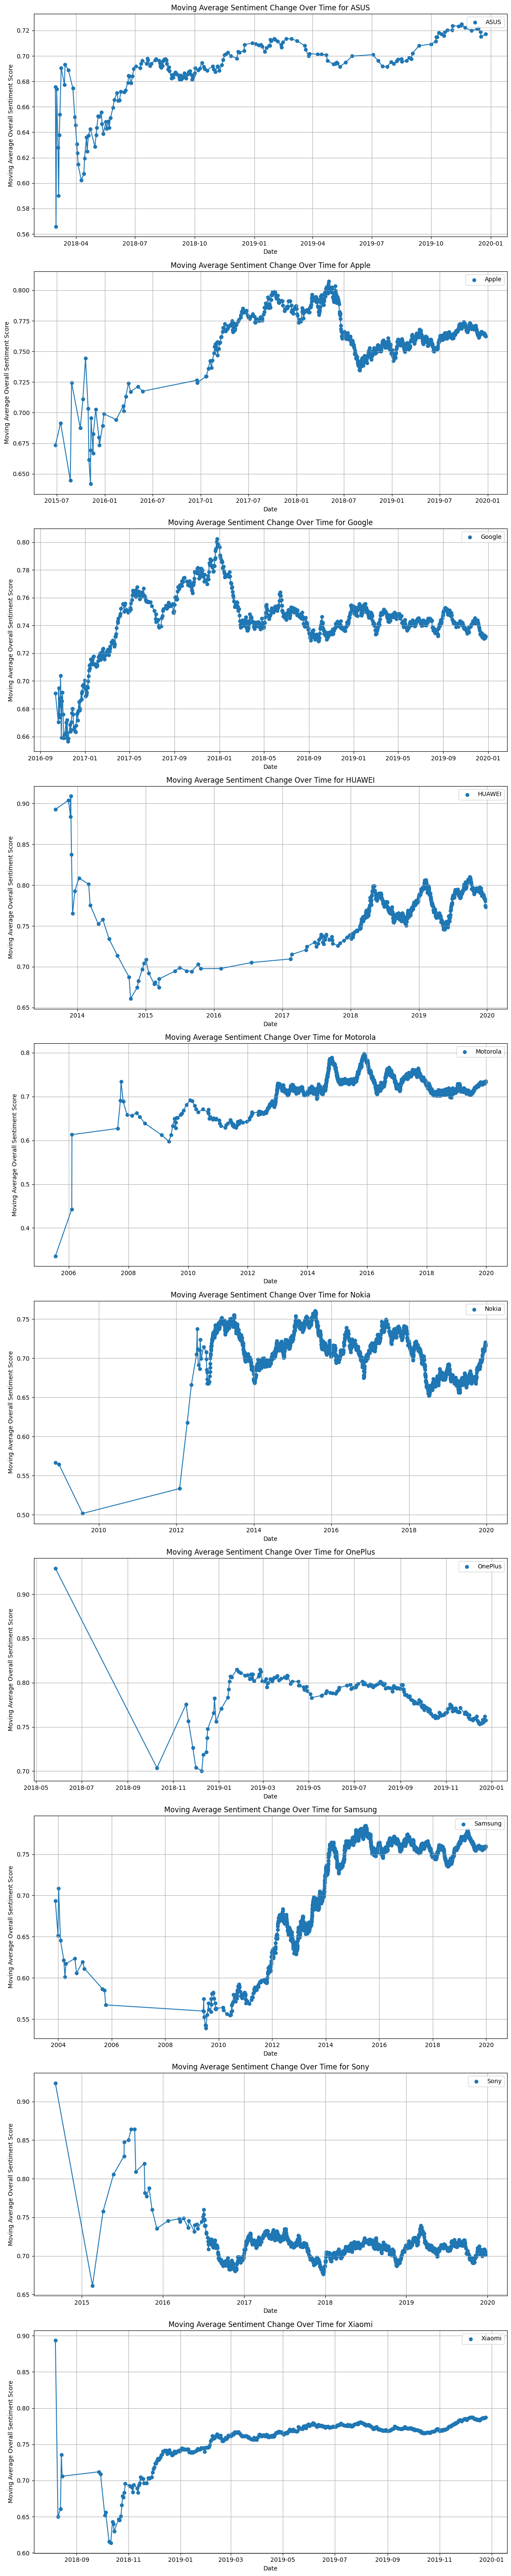

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Group the data by the brand and date, and compute the average overall sentiment score for each brand and date
brand_sentiment_over_time = df.groupby(['brand', pd.Grouper(key='date', freq='D')]).agg({'overall_sentiment_score': 'mean'}).reset_index()

# 2. Calculate the moving average for each brand
moving_avg_window = 100  # Increased window size
brand_sentiment_over_time['moving_average'] = brand_sentiment_over_time.groupby('brand')['overall_sentiment_score'].rolling(window=moving_avg_window, min_periods=1).mean().reset_index(drop=True)

# 3. Plot the moving average sentiment change over time for each brand using separate subplots
unique_brands = brand_sentiment_over_time['brand'].unique()

plt.figure(figsize=(12, 6 * len(unique_brands)))

for i, brand in enumerate(unique_brands, start=1):
    brand_data = brand_sentiment_over_time[brand_sentiment_over_time['brand'] == brand]

    plt.subplot(len(unique_brands), 1, i)
    plt.scatter(brand_data['date'], brand_data['moving_average'], label=brand, marker='o', s=30)
    plt.plot(brand_data['date'], brand_data['moving_average'], linestyle='-')
    plt.title(f'Moving Average Sentiment Change Over Time for {brand}')
    plt.xlabel('Date')
    plt.ylabel('Moving Average Overall Sentiment Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Average Overall seniment of 5 random products over the period of time 

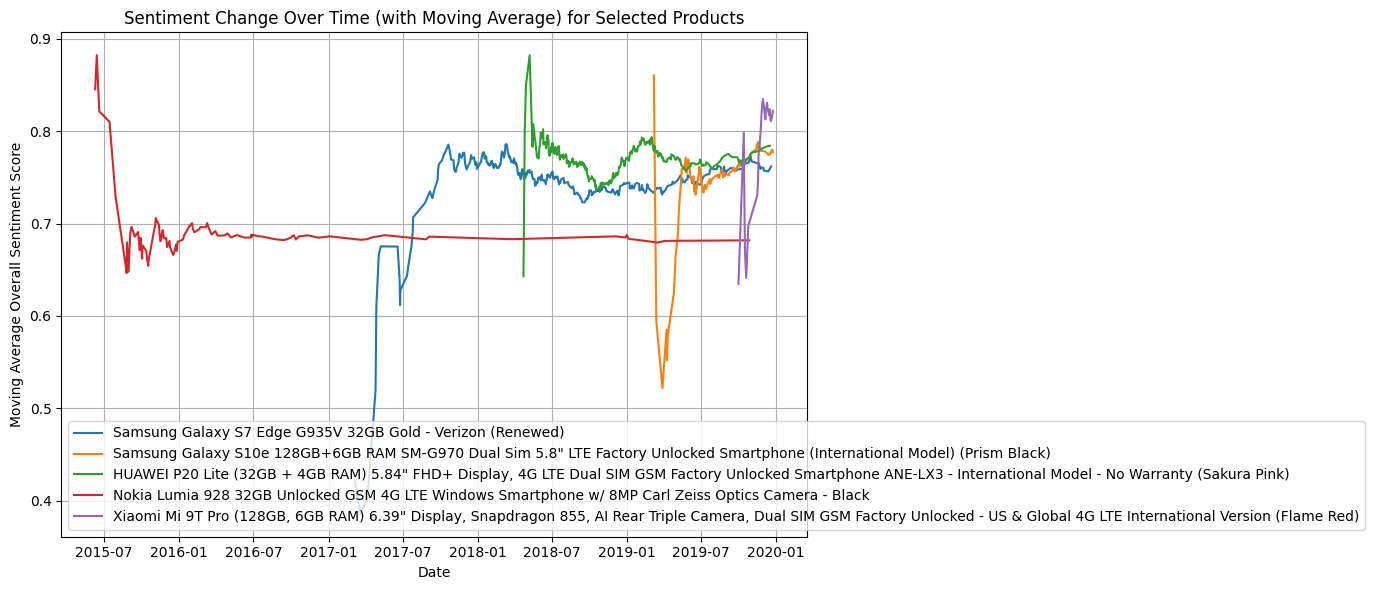

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing sentiment scores, dates, ASINs, review titles, product information, and brand information

# 1. Randomly select 5 products
random_products = df['product'].sample(n=5, random_state=42).unique()

# 2. Filter the dataframe to include only the selected products
df_selected_products = df[df['product'].isin(random_products)]

# 3. Group the filtered data by date and compute the average overall sentiment score for each product and date
product_sentiment_over_time = df_selected_products.groupby(['product', pd.Grouper(key='date', freq='D')]).agg({'overall_sentiment_score': 'mean'}).reset_index()

# 4. Calculate the moving average for each product
moving_avg_window = 100  # Adjust the window size as needed
product_sentiment_over_time['moving_average'] = product_sentiment_over_time.groupby('product')['overall_sentiment_score'].rolling(window=moving_avg_window, min_periods=1).mean().reset_index(drop=True)

# 5. Plot the sentiment change over time with moving average for each selected product
plt.figure(figsize=(12, 6))
for product in random_products:
    product_data = product_sentiment_over_time[product_sentiment_over_time['product'] == product]
    plt.plot(product_data['date'], product_data['moving_average'], label=product)

plt.title('Sentiment Change Over Time (with Moving Average) for Selected Products')
plt.xlabel('Date')
plt.ylabel('Moving Average Overall Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Overall sentiment score of 5 Random Customer over the period of time

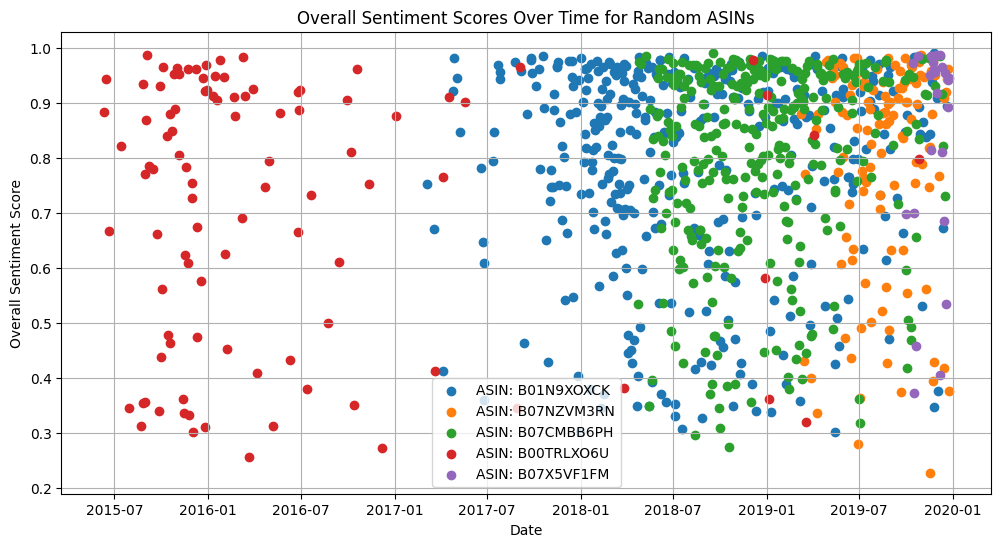

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Filter the dataframe to select 5 random ASINs
random_asins = df['asin'].sample(n=5, random_state=42).unique()

# 2. Filter the dataframe to include only the selected ASINs
df_selected_asins = df[df['asin'].isin(random_asins)]

# 3. Group the data by the specified time period (e.g., daily) and compute the overall sentiment score for each group
daily_sentiment = df_selected_asins.groupby([pd.Grouper(freq='D'), 'asin']).agg({'overall_sentiment_score': 'mean'}).unstack()

# 4. Plot the overall sentiment scores for each ASIN over time
plt.figure(figsize=(12, 6))
for asin in random_asins:
    plt.scatter(daily_sentiment.index, daily_sentiment['overall_sentiment_score'][asin], label=f'ASIN: {asin}')
plt.title('Overall Sentiment Scores Over Time for Random ASINs')
plt.xlabel('Date')
plt.ylabel('Overall Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
padded_sequences

array([[   3,   27,    2, ...,    7,   17, 2902],
       [ 483,    8,    6, ...,  781,  802, 4943],
       [  10,    9,    6, ...,   19,  454,  601],
       ...,
       [   0,    0,    0, ...,   11,   14, 5202],
       [   0,    0,    0, ...,   31,  101,  183],
       [   0,    0,    0, ...,    5,    8,   49]], dtype=int32)

In [ ]:
padded_sequence = model.predict(padded_sequences)

2125/2125 [==============================] - 10s 5ms/step


In [ ]:
padded_sequences.shape

(67986, 100)

In [ ]:
padded_sequence

array([[4.8413527e-01, 1.9544074e-01, 1.9229369e-01, 6.5929711e-02,
        6.2200524e-02],
       [8.2432228e-01, 8.5408777e-02, 3.9448824e-02, 1.0077702e-02,
        4.0742468e-02],
       [7.8274533e-03, 1.9699274e-02, 1.0145861e-01, 4.4888112e-01,
        4.2213359e-01],
       ...,
       [1.3038308e-02, 5.7305535e-03, 1.5722793e-02, 8.8977337e-02,
        8.7653106e-01],
       [3.3482988e-04, 2.3372308e-04, 2.0187858e-03, 3.2633461e-02,
        9.6477926e-01],
       [1.5663634e-04, 1.3259795e-04, 1.0995863e-03, 2.5197923e-02,
        9.7341329e-01]], dtype=float32)

In [ ]:
import numpy as np

# Convert probabilities to sentiment labels
predicted_sentiments = np.argmax(padded_sequence, axis=1)

# Map sentiment labels back to original sentiment values (adding 1 to match original encoding)
predicted_sentiments += 1

# Display predicted sentiments
print(predicted_sentiments)

[1 1 4 ... 5 5 5]


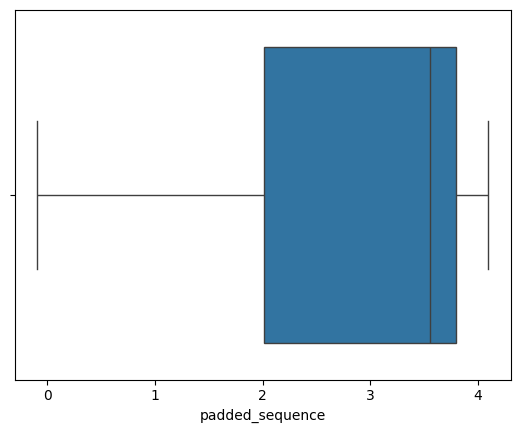

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x= df['padded_sequence'])
plt.show()

## Sentiment Analysis using Textblob 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob

# Step 1: Calculate Sentiment Score with TextBlob
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 2: Sentiment Classification with LSTM
# Build the LSTM model
embedding_dim = 16
num_classes = 2  # Positive or Negative
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

# Step 3: Analyze Sentiment Change over Time
sentiment_change = df.groupby(['asin', 'date']).agg({'sentiment_score': 'mean'}).reset_index()

# Now you have sentiment scores averaged over time for each ASIN.


Epoch 1/5
1700/1700 [==============================] - 55s 30ms/step - loss: nan - accuracy: 0.1867 - val_loss: nan - val_accuracy: 0.1903
Epoch 2/5
1700/1700 [==============================] - 23s 13ms/step - loss: nan - accuracy: 0.1867 - val_loss: nan - val_accuracy: 0.1903
Epoch 3/5
1700/1700 [==============================] - 22s 13ms/step - loss: nan - accuracy: 0.1867 - val_loss: nan - val_accuracy: 0.1903
Epoch 4/5
1700/1700 [==============================] - 22s 13ms/step - loss: nan - accuracy: 0.1867 - val_loss: nan - val_accuracy: 0.1903
Epoch 5/5
1700/1700 [==============================] - 20s 12ms/step - loss: nan - accuracy: 0.1867 - val_loss: nan - val_accuracy: 0.1903


## Sentiment Analysis Comparision of LSTM Prediction vs Textbob(NLTK) 

In [ ]:
df['overall_sentiment_class'].value_counts()

Positive    56192
Negative    11794
Name: overall_sentiment_class, dtype: int64

In [ ]:
df['sentiment_class_Textblob'].value_counts()

positive    49160
negative    18826
Name: sentiment_class_Textblob, dtype: int64

In [ ]:
df[['overall_sentiment_score','overall_sentiment_class','sentiment_score','sentiment_class_Textblob']]

,overall_sentiment_score,overall_sentiment_class,sentiment_score,sentiment_class_Textblob
timestamp,,,,
2005-10-11,0.553630,Positive,0.119780,positive
2004-01-07,0.841557,Positive,0.119792,positive
2003-12-30,0.495616,Negative,0.247381,positive
2004-03-18,0.394651,Negative,0.301563,positive
2005-08-28,0.379217,Negative,0.070000,positive
...,...,...,...,...
2019-08-16,0.887470,Positive,0.207792,positive
2019-09-14,0.947268,Positive,0.173437,positive
2019-07-14,0.927446,Positive,0.500000,positive


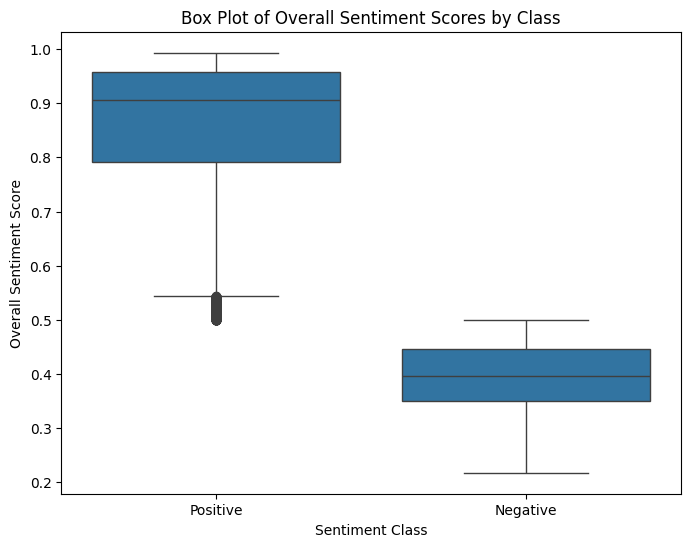

In [ ]:
# prompt: df['overall_sentiment_score'] box plot

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['overall_sentiment_class'], y=df['overall_sentiment_score'])
plt.xlabel('Sentiment Class')
plt.ylabel('Overall Sentiment Score')
plt.title('Box Plot of Overall Sentiment Scores by Class')
plt.show()


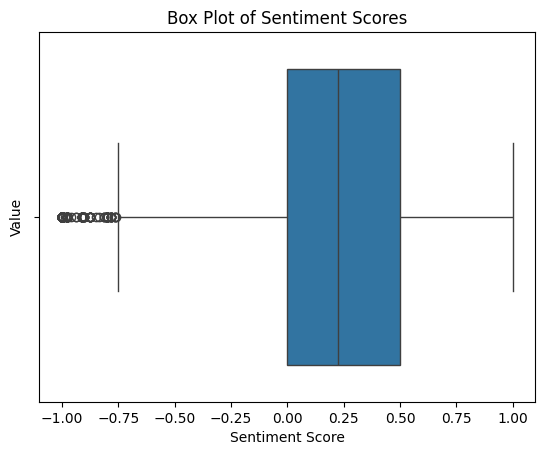

In [ ]:
# prompt: df['sentiment_score'] box plot

import seaborn as sns

# Create a box plot of the 'sentiment_score' column
sns.boxplot(x=df['sentiment_score'])

# Add a title and axis labels
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Value')

# Show the plot
plt.show()


In [ ]:
df[['overall_sentiment_score','sentiment_score']]

,overall_sentiment_score,sentiment_score
timestamp,,
2005-10-11,0.553630,0.119780
2004-01-07,0.841557,0.119792
2003-12-30,0.495616,0.247381
2004-03-18,0.394651,0.301563
2005-08-28,0.379217,0.070000
...,...,...
2019-08-16,0.887470,0.207792
2019-09-14,0.947268,0.173437
2019-07-14,0.927446,0.500000


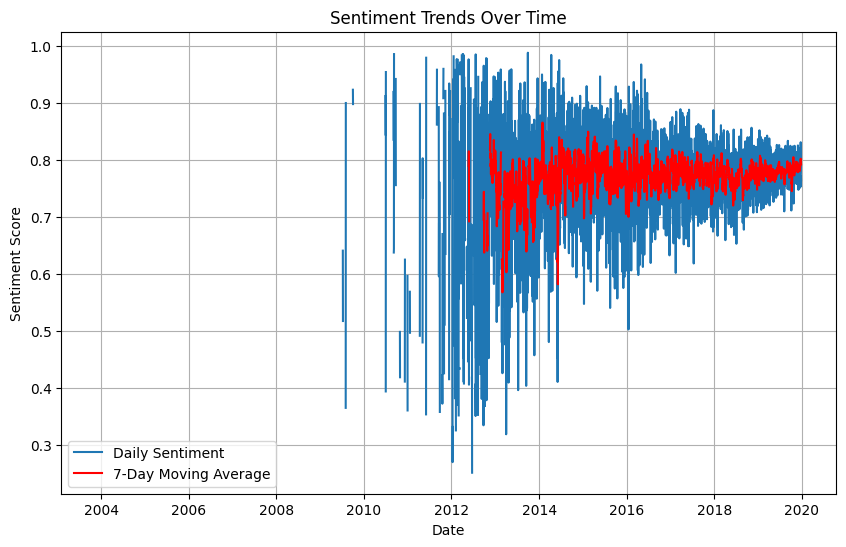

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing sentiment scores and timestamps

# Convert timestamp column to datetime if not already in datetime format
df['timestamp'] = pd.to_datetime(df['date'])

# Set timestamp column as the index
df.set_index('timestamp', inplace=True)

# Resample data to daily frequency and compute mean sentiment score for each day
daily_sentiment = df['overall_sentiment_score'].resample('D').mean()

# Perform time series analysis (e.g., simple moving average)
rolling_mean = daily_sentiment.rolling(window=7).mean()  # 7-day moving average

# Visualize sentiment trends using time-series plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment, label='Daily Sentiment')
plt.plot(rolling_mean, color='red', label='7-Day Moving Average')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

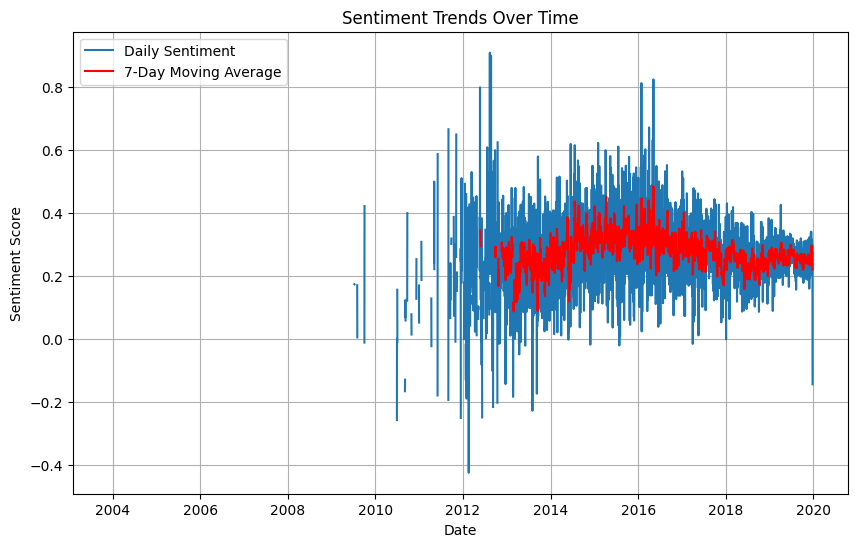

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing sentiment scores and timestamps

# Convert timestamp column to datetime if not already in datetime format
df['timestamp'] = pd.to_datetime(df['date'])

# Set timestamp column as the index
df.set_index('timestamp', inplace=True)

# Resample data to daily frequency and compute mean sentiment score for each day
daily_sentiment = df['sentiment_score'].resample('D').mean()

# Perform time series analysis (e.g., simple moving average)
rolling_mean = daily_sentiment.rolling(window=7).mean()  # 7-day moving average

# Visualize sentiment trends using time-series plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment, label='Daily Sentiment')
plt.plot(rolling_mean, color='red', label='7-Day Moving Average')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['sentiment_class_Textblob'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [ ]:
sentiment_change

,asin,date,sentiment_score
0,B0000SX2UC,2003-11-24,0.282000
1,B0000SX2UC,2003-12-30,0.247381
2,B0000SX2UC,2004-01-07,0.119792
3,B0000SX2UC,2004-02-02,0.248148
4,B0000SX2UC,2004-03-18,0.301563
...,...,...,...
51443,B081H6STQQ,2019-11-15,0.050000
51444,B081H6STQQ,2019-12-07,1.000000
51445,B081H6STQQ,2019-12-15,0.364000
51446,B081TJFVCJ,2019-12-24,0.198182


In [ ]:
df

,asin,name,rating_x,date,verified,review_title,body,helpfulVotes,brand,product,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice,encoded_label,sentiment_score
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,2,0.119780
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,0,0.119792
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,4,0.247381
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,2,0.301563
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.00000,Samsung,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,3,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,2019-08-16,False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.00000,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,4,0.207792
67982,B081H6STQQ,2cool4u,5,2019-09-14,False,Simply Amazing!,I've been an Xperia user for several years and...,1.00000,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,4,0.173437
67983,B081H6STQQ,simon,5,2019-07-14,False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,8.22969,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,4,0.500000
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,2019-12-24,True,Phone is like new,Product looks and works like new. Very much re...,8.22969,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00,4,0.198182


## Customer Sentiment over period of time

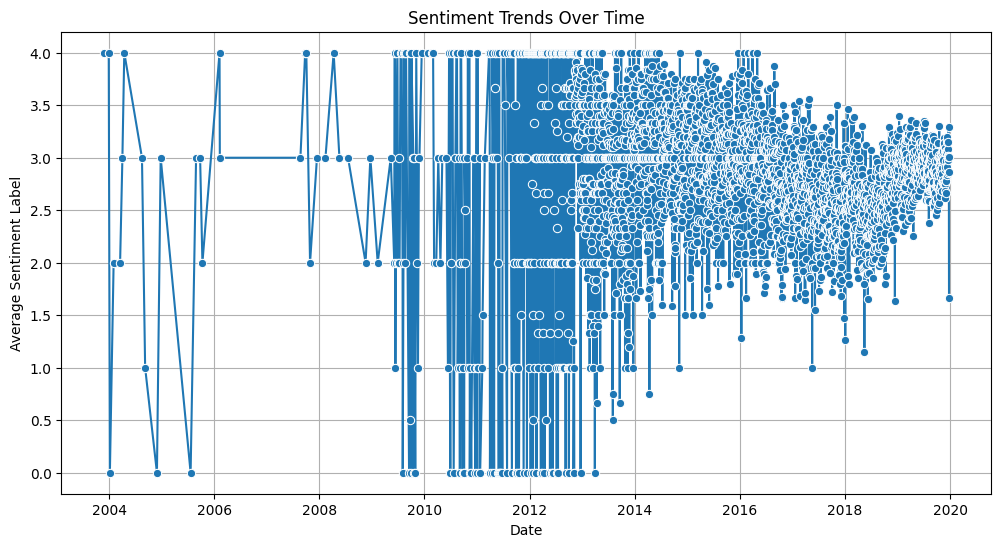

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set 'date' as the index for time series analysis
df.set_index('date', inplace=True)
df['encoded_label'] = df['rating_x'] - 1
# Resample the data to a desired frequency (e.g., daily) and aggregate sentiment labels
resampled_df = df['encoded_label'].resample('D').mean()

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled_df, marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Label')
plt.grid(True)
plt.show()


Epoch 1/5
1700/1700 [==============================] - 112s 65ms/step - loss: 0.9548 - accuracy: 0.6621 - val_loss: 0.8614 - val_accuracy: 0.6958
Epoch 2/5
1700/1700 [==============================] - 106s 62ms/step - loss: 0.8283 - accuracy: 0.7021 - val_loss: 0.8279 - val_accuracy: 0.7015
Epoch 3/5
1700/1700 [==============================] - 114s 67ms/step - loss: 0.8105 - accuracy: 0.7048 - val_loss: 0.8365 - val_accuracy: 0.7065
Epoch 4/5
1700/1700 [==============================] - 108s 64ms/step - loss: 0.7535 - accuracy: 0.7195 - val_loss: 0.8130 - val_accuracy: 0.7016
Epoch 5/5
1700/1700 [==============================] - 107s 63ms/step - loss: 0.8008 - accuracy: 0.7098 - val_loss: 0.8522 - val_accuracy: 0.7041


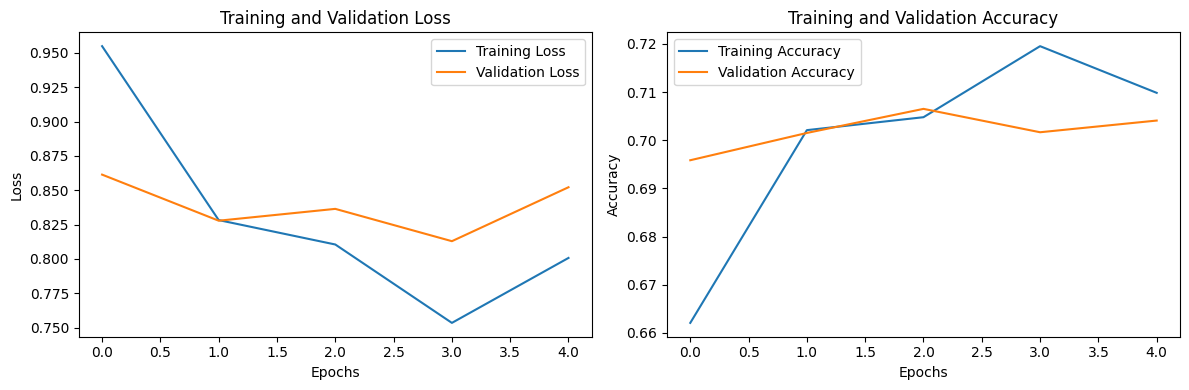

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns



# Handle missing values in 'body' column
df['body'].fillna('', inplace=True)

# Subtract 1 from 'rating_x' to start encoding from 0
df['encoded_label'] = df['rating_x'] - 1

# Tokenize and pad the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['body'])
sequences = tokenizer.texts_to_sequences(df['body'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    padded_sequences, df['encoded_label'], test_size=0.2, random_state=42
)

# Build a Simple RNN model for sentiment trends
embedding_dim = 16
num_classes = 5  # Number of unique classes

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(64, activation='relu', return_sequences=True),
    SimpleRNN(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Evaluating the Performe of the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

# Assuming 'model' is your trained model and 'test_data', 'test_labels' are your test sets

# Predictions
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_labels = predictions.argmax(axis=1)

# Calculate MAE, MSE, Accuracy, and R2 Score
mae = mean_absolute_error(test_labels, predicted_labels)
mse = mean_squared_error(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)
r2 = r2_score(test_labels, predicted_labels)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'R2 Score: {r2}')


425/425 [==============================] - 10s 23ms/step
Mean Absolute Error (MAE): 0.5405206648036476
Mean Squared Error (MSE): 1.3157817326077363
Accuracy: 70.41%
R2 Score: 0.4785101683762921


425/425 [==============================] - 8s 18ms/step


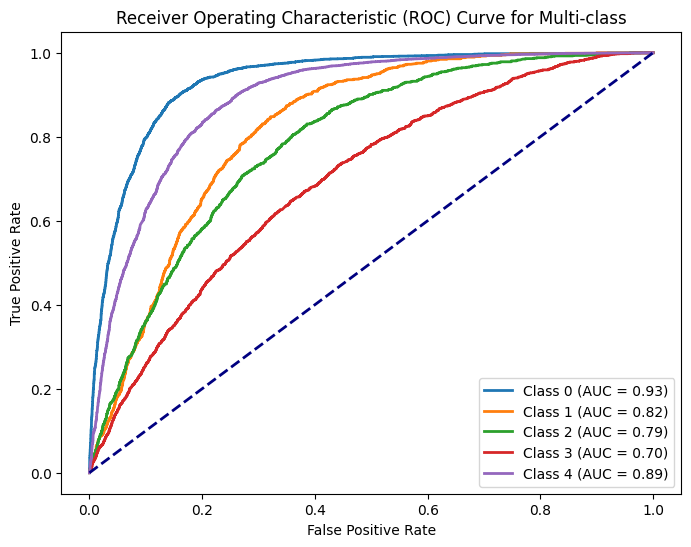

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'test_data', 'test_labels' are your test sets

# Predictions
predictions = model.predict(test_data)

# Convert labels to one-hot encoding
binarized_labels = label_binarize(test_labels, classes=[0, 1, 2, 3, 4])

# Number of classes
num_classes = binarized_labels.shape[1]

# Initialize dictionaries for fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate fpr, tpr, and roc_auc for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

## Customer senstiment trend change for 5 Randomly choosed  customers

<ipython-input-86-6267a4a70430>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['date'] = pd.to_datetime(selected_df['date'])


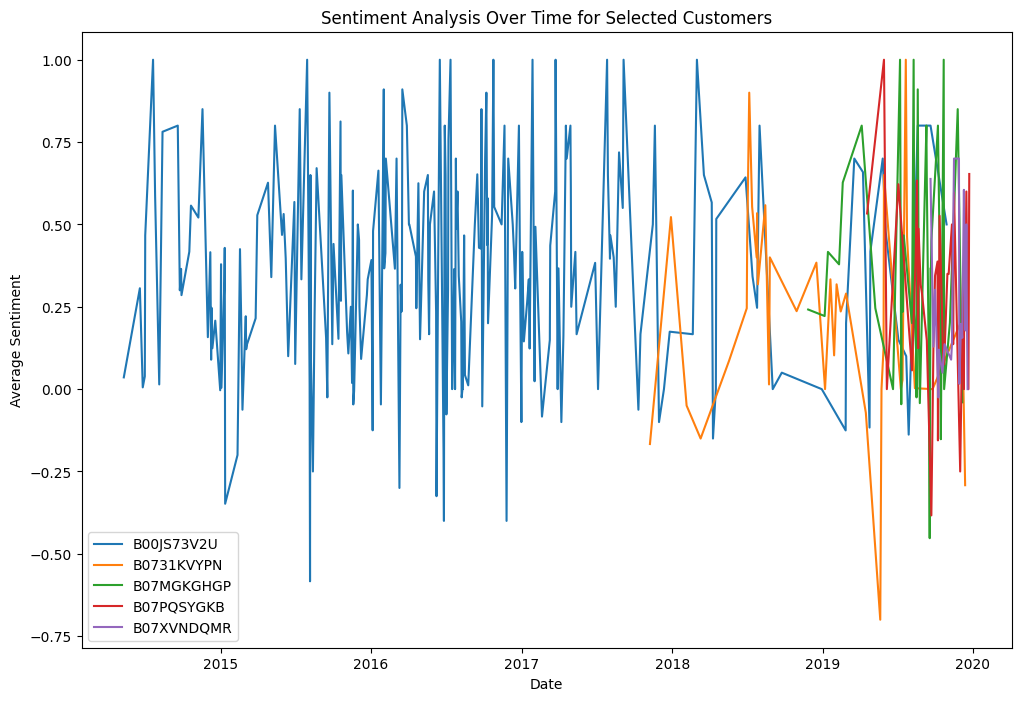

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob  # You may need to install this library: pip install textblob

# Assuming 'df' is your DataFrame

# Randomly select 5 customer IDs (asin)
selected_asins = np.random.choice(df['asin'].unique(), size=5, replace=False)

# Filter the DataFrame for the selected customer IDs
selected_df = df[df['asin'].isin(selected_asins)]

# Convert 'date' column to datetime
selected_df['date'] = pd.to_datetime(selected_df['date'])

# Group by asin and date, calculate average sentiment for each day
sentiments = []

for asin, group in selected_df.groupby('asin'):
    for date, reviews in group.groupby('date'):
        sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews['body']]
        average_sentiment = np.mean(sentiment_scores)
        sentiments.append({'asin': asin, 'date': date, 'average_sentiment': average_sentiment})

# Create a new DataFrame for sentiments
sentiments_df = pd.DataFrame(sentiments)

# Plot sentiment trends over time for each selected customer
plt.figure(figsize=(12, 8))

for asin, group in sentiments_df.groupby('asin'):
    plt.plot(group['date'], group['average_sentiment'], label=asin)

plt.title('Sentiment Analysis Over Time for Selected Customers')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend()
plt.show()
